# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base.base_models import BaseModel
from base.model_creator import Optimizer, MTLApproach
from base.model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 81589
Process ID: 94853
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',
 

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4926, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3612 (73.33%)
N_TRAIN_NOT_COMP: 1314 (26.67%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 408 (74.59%)
N_VALIDATION_NOT_COMP: 139 (25.41%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 222 (77.08%)
N_TEST_NOT_COMP: 66 (22.92%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3704 (75.19%)
N_TRAIN_NOT_COMP: 1222 (24.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 405 (74.04%)
N_VALIDATION_NOT_COMP: 142 (25.96%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 223 (77.43%)
N_TEST_NOT_COMP: 65 (22.57%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3388 (68.78%)
N_TRAIN_NOT_COMP: 1538 (31.22%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 373 (68.19%)
N_VALIDATION_NOT_COMP: 174 (31.81%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 195 (67.71%)
N_TEST_NOT_COMP: 93 (32.29%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3896 (79.09%)
N_TRAIN_NOT_COMP: 1030 (20.91%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


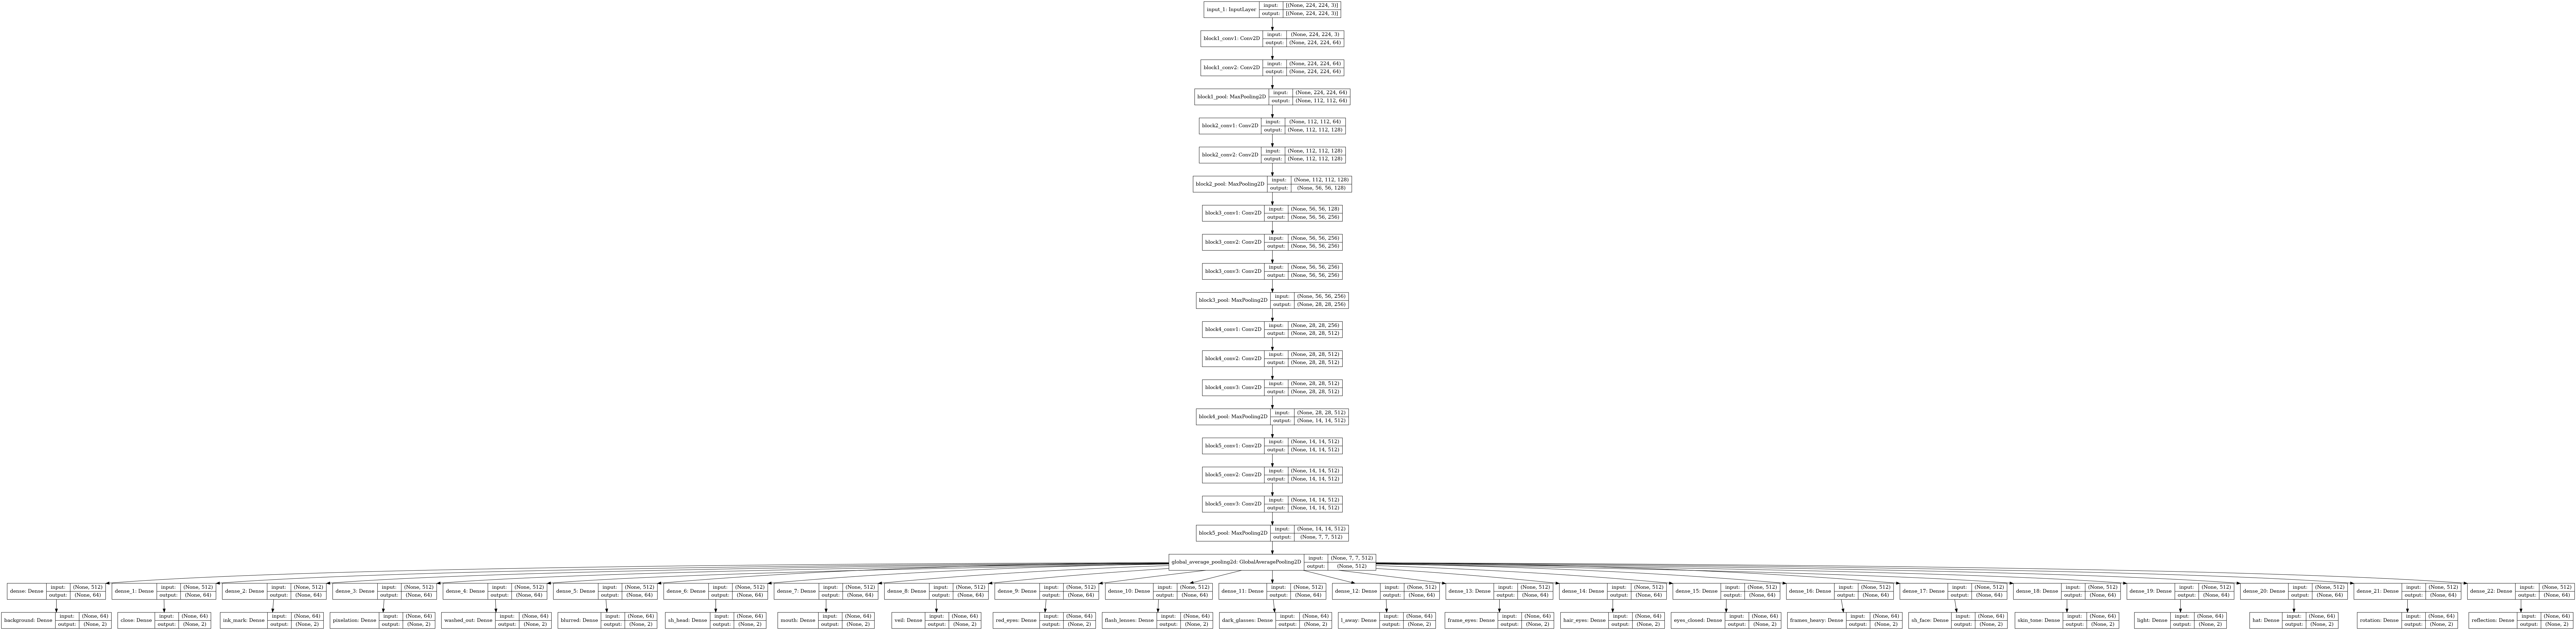

In [11]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,472,814
  .. Trainable params: 758,126
  .. Non-trainable params: 14,714,688
Epoch 1/2
153/153 [==============================] - 58s 310ms/step - loss: 3.1946 - background_loss: 1.8874 - close_loss: 1.3943 - ink_mark_loss: 2.0126 - pixelation_loss: 1.7604 - washed_out_loss: 0.1364 - blurred_loss: 1.0873 - sh_head_loss: 0.9678 - mouth_loss: 0.1067 - veil_loss: 2.2097 - red_eyes_loss: 1.8072 - flash_lenses_loss: 0.8594 - dark_glasses_loss: 2.7912 - l_away_loss: 0.8412 - frame_eyes_loss: 2.0716 - hair_eyes_loss: 2.0460 - eyes_closed_loss: 0.8286 - frames_heavy_loss: 0.0787 - sh_face_loss: 2.8779 - skin_tone_loss: 0.1181 - light_loss: 0.7281 - hat_loss: 1.3268 - rotation_loss: 2.1277 - reflection_loss: 1.8814 - background_accuracy: 0.7176 - close_accuracy: 0.7383 - ink_mark_accuracy: 0.6743 - pixelation_accuracy: 0.7769 - washed_out_accuracy: 0.9771 - blurred

# Plots

-------------------- draw training history -------------------


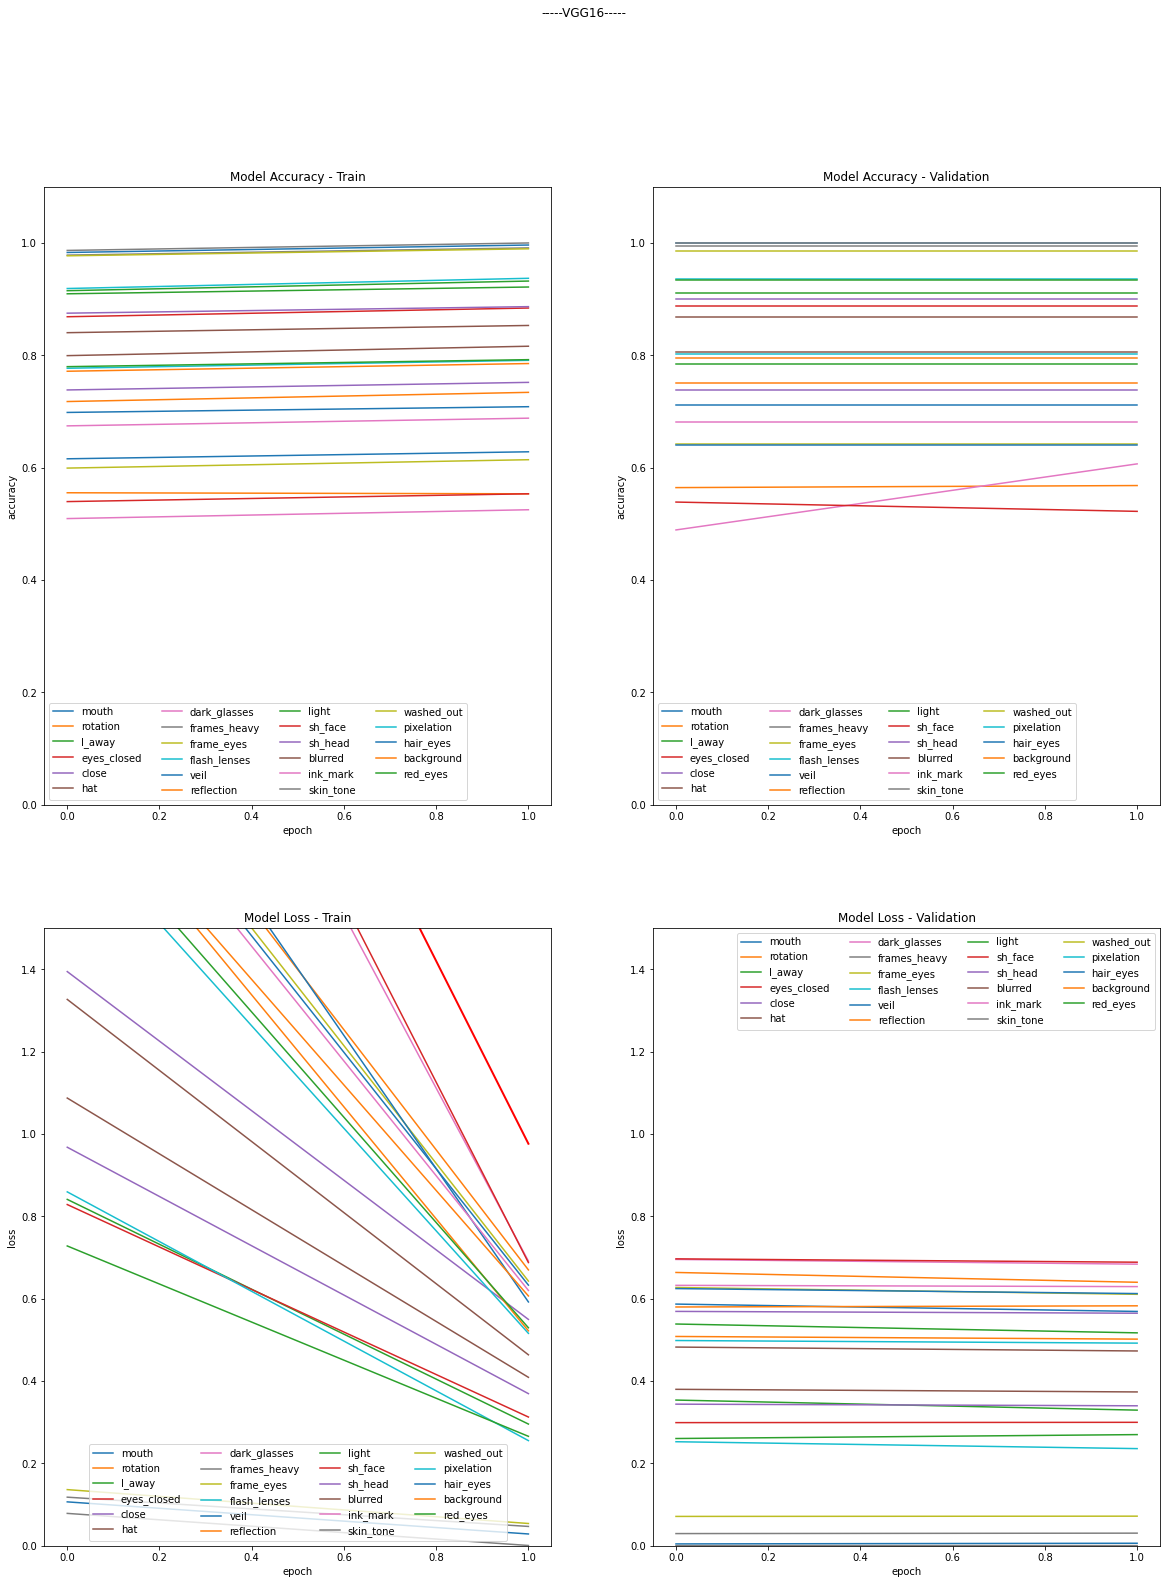

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 1s 65ms/step
Prediction finished!
Requisite: MOUTH


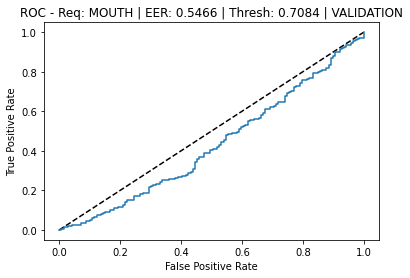

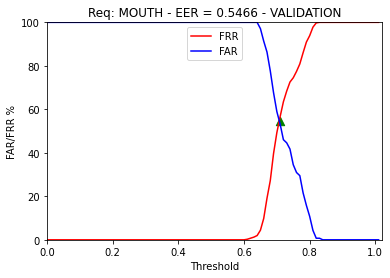

Requisite: MOUTH - EER_interp: 54.66% - Best Threshold: 0.7084460280397359
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.22      0.46      0.30       139
    COMPLIANT       0.71      0.45      0.55       408

     accuracy                           0.46       547
    macro avg       0.47      0.46      0.43       547
 weighted avg       0.59      0.46      0.49       547

Confusion matrix ----------------------------------------
FAR: 53.959999999999994% | FRR: 54.66% | EER_mean: 54.31% | TP: 185 | TN: 64 | FP: 75 | FN: 223
Accuracy ------------------------------------------------
Model Accuracy: 45.519999999999996%
---------------------------------------------------------
Requisite: ROTATION


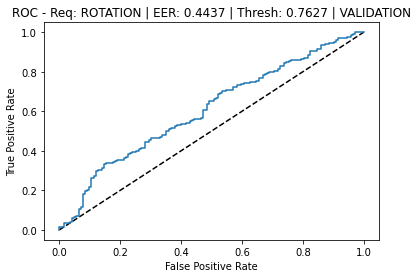

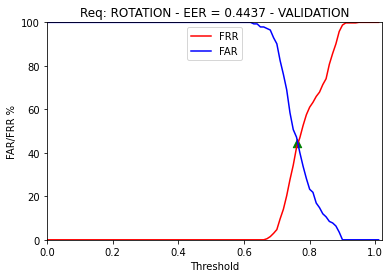

Requisite: ROTATION - EER_interp: 44.37% - Best Threshold: 0.7627298235893447
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.31      0.56      0.39       142
    COMPLIANT       0.78      0.56      0.65       405

     accuracy                           0.56       547
    macro avg       0.54      0.56      0.52       547
 weighted avg       0.66      0.56      0.58       547

Confusion matrix ----------------------------------------
FAR: 44.37% | FRR: 44.440000000000005% | EER_mean: 44.4% | TP: 225 | TN: 79 | FP: 63 | FN: 180
Accuracy ------------------------------------------------
Model Accuracy: 55.58%
---------------------------------------------------------
Requisite: L_AWAY


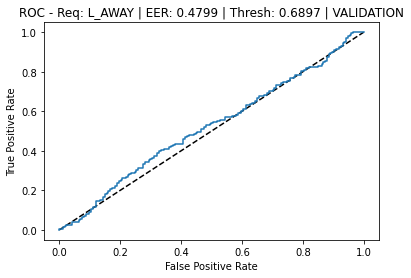

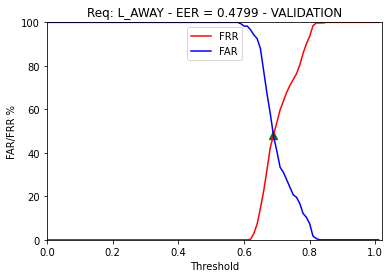

Requisite: L_AWAY - EER_interp: 47.99% - Best Threshold: 0.6896941065788269
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.34      0.52      0.41       174
    COMPLIANT       0.70      0.52      0.60       373

     accuracy                           0.52       547
    macro avg       0.52      0.52      0.50       547
 weighted avg       0.58      0.52      0.54       547

Confusion matrix ----------------------------------------
FAR: 47.699999999999996% | FRR: 47.99% | EER_mean: 47.839999999999996% | TP: 194 | TN: 91 | FP: 83 | FN: 179
Accuracy ------------------------------------------------
Model Accuracy: 52.1%
---------------------------------------------------------
Requisite: EYES_CLOSED


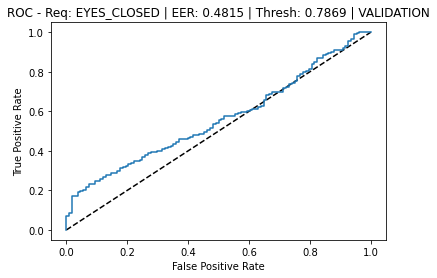

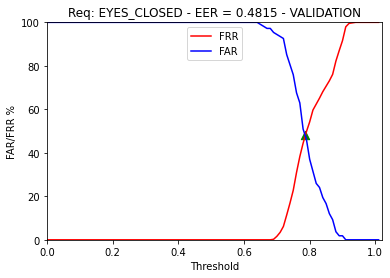

Requisite: EYES_CLOSED - EER_interp: 48.15% - Best Threshold: 0.7868619561195982
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.21      0.52      0.30       108
    COMPLIANT       0.81      0.51      0.63       439

     accuracy                           0.52       547
    macro avg       0.51      0.52      0.46       547
 weighted avg       0.69      0.52      0.56       547

Confusion matrix ----------------------------------------
FAR: 48.15% | FRR: 48.52% | EER_mean: 48.339999999999996% | TP: 226 | TN: 56 | FP: 52 | FN: 213
Accuracy ------------------------------------------------
Model Accuracy: 51.55%
---------------------------------------------------------
Requisite: CLOSE


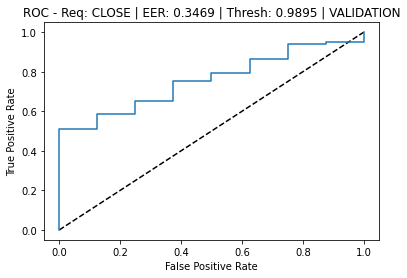

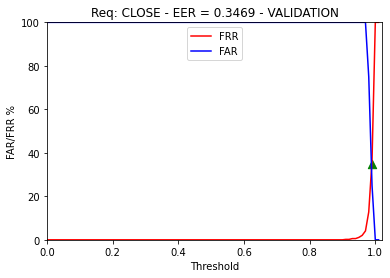

Requisite: CLOSE - EER_interp: 34.69% - Best Threshold: 0.9895265710597134
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      0.75      0.06         8
    COMPLIANT       0.99      0.65      0.79       539

     accuracy                           0.65       547
    macro avg       0.51      0.70      0.42       547
 weighted avg       0.98      0.65      0.78       547

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 34.69% | EER_mean: 29.84% | TP: 352 | TN: 6 | FP: 2 | FN: 187
Accuracy ------------------------------------------------
Model Accuracy: 65.45%
---------------------------------------------------------
Requisite: HAT


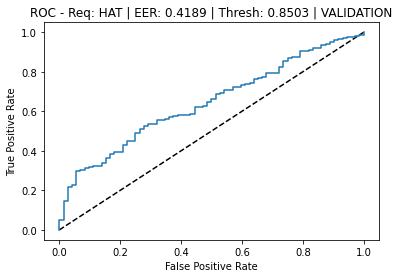

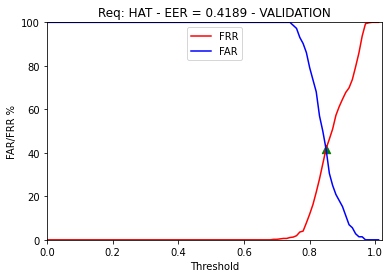

Requisite: HAT - EER_interp: 41.89% - Best Threshold: 0.8503145988363819
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      0.58      0.27        72
    COMPLIANT       0.90      0.58      0.71       475

     accuracy                           0.58       547
    macro avg       0.54      0.58      0.49       547
 weighted avg       0.81      0.58      0.65       547

Confusion matrix ----------------------------------------
FAR: 41.67% | FRR: 41.89% | EER_mean: 41.78% | TP: 276 | TN: 42 | FP: 30 | FN: 199
Accuracy ------------------------------------------------
Model Accuracy: 58.14%
---------------------------------------------------------
Requisite: DARK_GLASSES


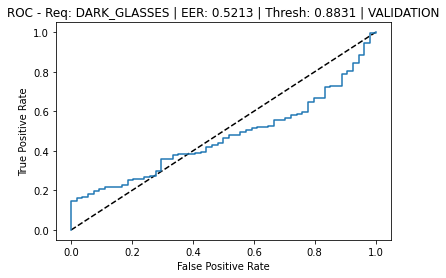

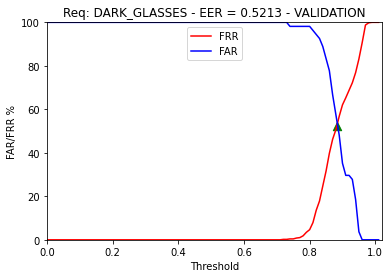

Requisite: DARK_GLASSES - EER_interp: 52.129999999999995% - Best Threshold: 0.8830628405961739
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.09      0.48      0.15        54
    COMPLIANT       0.89      0.48      0.62       493

     accuracy                           0.48       547
    macro avg       0.49      0.48      0.39       547
 weighted avg       0.81      0.48      0.58       547

Confusion matrix ----------------------------------------
FAR: 51.849999999999994% | FRR: 52.129999999999995% | EER_mean: 51.99% | TP: 236 | TN: 26 | FP: 28 | FN: 257
Accuracy ------------------------------------------------
Model Accuracy: 47.9%
---------------------------------------------------------
Requisite: FRAME_EYES


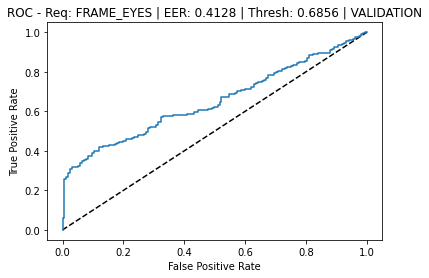

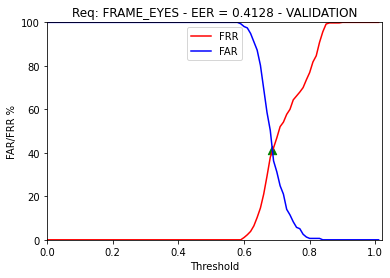

Requisite: FRAME_EYES - EER_interp: 41.28% - Best Threshold: 0.6856355220843584
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.36      0.59      0.45       157
    COMPLIANT       0.78      0.59      0.67       390

     accuracy                           0.59       547
    macro avg       0.57      0.59      0.56       547
 weighted avg       0.66      0.59      0.61       547

Confusion matrix ----------------------------------------
FAR: 41.4% | FRR: 41.28% | EER_mean: 41.339999999999996% | TP: 229 | TN: 92 | FP: 65 | FN: 161
Accuracy ------------------------------------------------
Model Accuracy: 58.68%
---------------------------------------------------------
Requisite: FLASH_LENSES


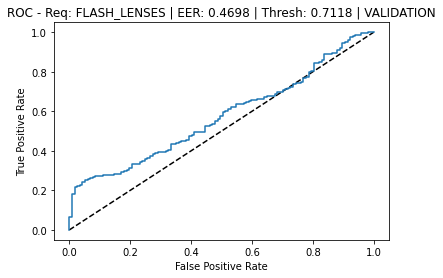

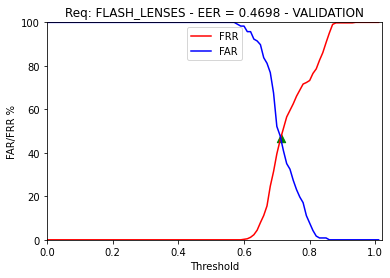

Requisite: FLASH_LENSES - EER_interp: 46.98% - Best Threshold: 0.7117972371190093
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.24      0.54      0.33       117
    COMPLIANT       0.81      0.53      0.64       430

     accuracy                           0.53       547
    macro avg       0.52      0.53      0.49       547
 weighted avg       0.69      0.53      0.57       547

Confusion matrix ----------------------------------------
FAR: 46.150000000000006% | FRR: 46.98% | EER_mean: 46.56% | TP: 228 | TN: 63 | FP: 54 | FN: 202
Accuracy ------------------------------------------------
Model Accuracy: 53.2%
---------------------------------------------------------
Requisite: VEIL


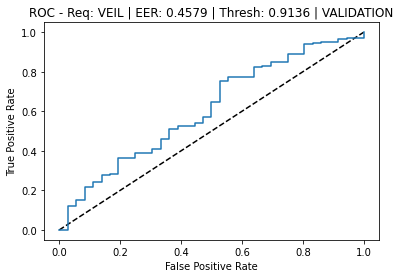

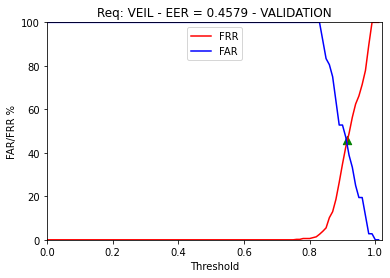

Requisite: VEIL - EER_interp: 45.79% - Best Threshold: 0.9136030228403916
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      0.56      0.14        36
    COMPLIANT       0.95      0.54      0.69       511

     accuracy                           0.54       547
    macro avg       0.51      0.55      0.41       547
 weighted avg       0.89      0.54      0.65       547

Confusion matrix ----------------------------------------
FAR: 44.440000000000005% | FRR: 45.79% | EER_mean: 45.12% | TP: 277 | TN: 20 | FP: 16 | FN: 234
Accuracy ------------------------------------------------
Model Accuracy: 54.300000000000004%
---------------------------------------------------------
Requisite: REFLECTION


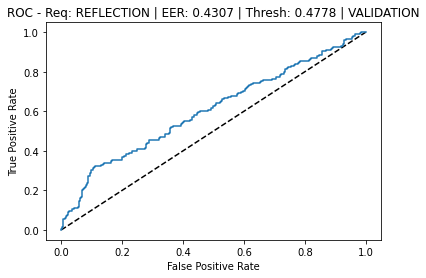

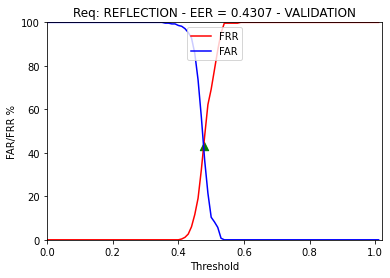

Requisite: REFLECTION - EER_interp: 43.07% - Best Threshold: 0.4777861259849777
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.57      0.58       280
    COMPLIANT       0.56      0.57      0.56       267

     accuracy                           0.57       547
    macro avg       0.57      0.57      0.57       547
 weighted avg       0.57      0.57      0.57       547

Confusion matrix ----------------------------------------
FAR: 42.86% | FRR: 43.07% | EER_mean: 42.96% | TP: 152 | TN: 160 | FP: 120 | FN: 115
Accuracy ------------------------------------------------
Model Accuracy: 57.04%
---------------------------------------------------------
Requisite: LIGHT


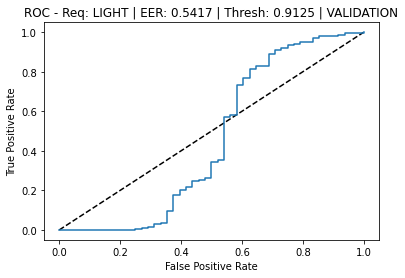

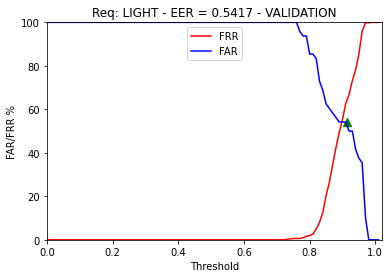

Requisite: LIGHT - EER_interp: 54.169999999999995% - Best Threshold: 0.912519156932834
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      0.46      0.11        48
    COMPLIANT       0.87      0.35      0.50       499

     accuracy                           0.36       547
    macro avg       0.47      0.41      0.31       547
 weighted avg       0.80      0.36      0.47       547

Confusion matrix ----------------------------------------
FAR: 54.169999999999995% | FRR: 64.53% | EER_mean: 59.35% | TP: 177 | TN: 22 | FP: 26 | FN: 322
Accuracy ------------------------------------------------
Model Accuracy: 36.38%
---------------------------------------------------------
Requisite: SH_FACE


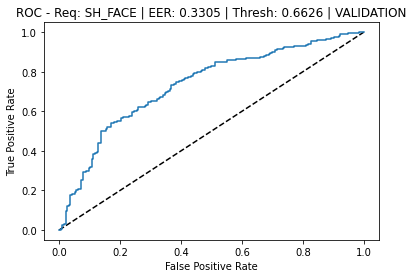

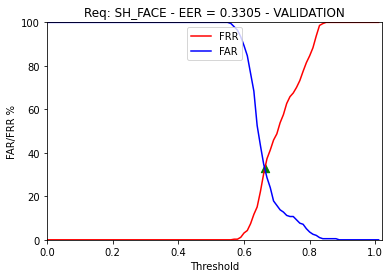

Requisite: SH_FACE - EER_interp: 33.050000000000004% - Best Threshold: 0.6625841098633288
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.67      0.59       196
    COMPLIANT       0.79      0.67      0.72       351

     accuracy                           0.67       547
    macro avg       0.66      0.67      0.66       547
 weighted avg       0.70      0.67      0.68       547

Confusion matrix ----------------------------------------
FAR: 32.65% | FRR: 33.050000000000004% | EER_mean: 32.85% | TP: 235 | TN: 132 | FP: 64 | FN: 116
Accuracy ------------------------------------------------
Model Accuracy: 67.09%
---------------------------------------------------------
Requisite: SH_HEAD


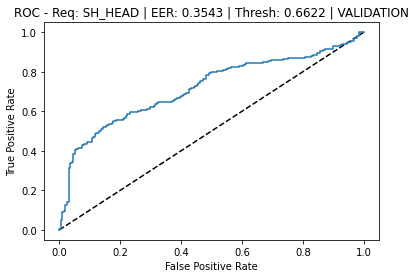

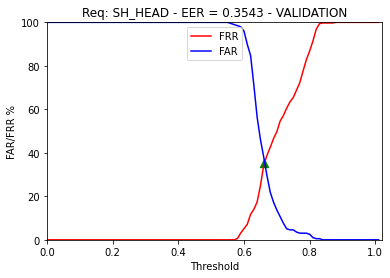

Requisite: SH_HEAD - EER_interp: 35.43% - Best Threshold: 0.6622407845088416
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.65      0.57       197
    COMPLIANT       0.77      0.65      0.70       350

     accuracy                           0.65       547
    macro avg       0.64      0.65      0.64       547
 weighted avg       0.67      0.65      0.65       547

Confusion matrix ----------------------------------------
FAR: 35.03% | FRR: 35.43% | EER_mean: 35.23% | TP: 226 | TN: 128 | FP: 69 | FN: 124
Accuracy ------------------------------------------------
Model Accuracy: 64.72%
---------------------------------------------------------
Requisite: BLURRED


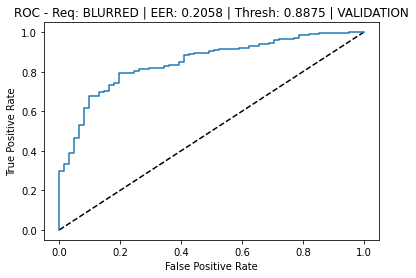

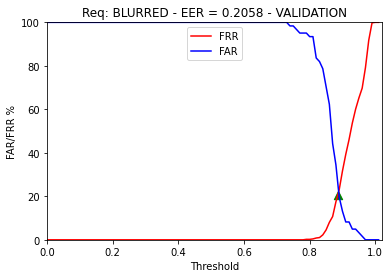

Requisite: BLURRED - EER_interp: 20.580000000000002% - Best Threshold: 0.8874861746822038
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.33      0.80      0.47        61
    COMPLIANT       0.97      0.79      0.87       486

     accuracy                           0.80       547
    macro avg       0.65      0.80      0.67       547
 weighted avg       0.90      0.80      0.83       547

Confusion matrix ----------------------------------------
FAR: 19.67% | FRR: 20.580000000000002% | EER_mean: 20.13% | TP: 386 | TN: 49 | FP: 12 | FN: 100
Accuracy ------------------------------------------------
Model Accuracy: 79.52%
---------------------------------------------------------
Requisite: SKIN_TONE


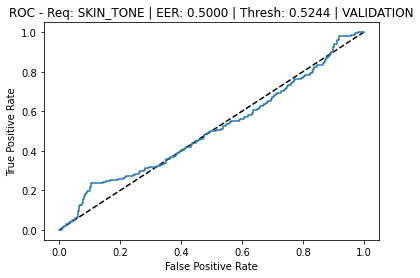

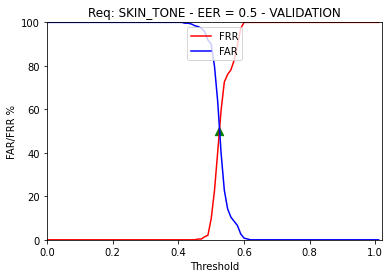

Requisite: SKIN_TONE - EER_interp: 50.0% - Best Threshold: 0.5243630111217499
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.47      0.50      0.49       259
    COMPLIANT       0.53      0.50      0.51       288

     accuracy                           0.50       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       0.50      0.50      0.50       547

Confusion matrix ----------------------------------------
FAR: 49.81% | FRR: 50.0% | EER_mean: 49.9% | TP: 144 | TN: 130 | FP: 129 | FN: 144
Accuracy ------------------------------------------------
Model Accuracy: 50.09%
---------------------------------------------------------
Requisite: WASHED_OUT


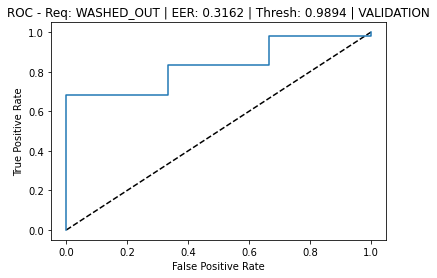

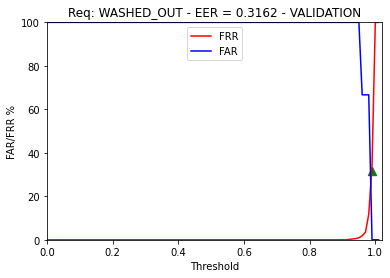

Requisite: WASHED_OUT - EER_interp: 31.619999999999997% - Best Threshold: 0.9893941616310793
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.02      1.00      0.03         3
    COMPLIANT       1.00      0.68      0.81       544

     accuracy                           0.69       547
    macro avg       0.51      0.84      0.42       547
 weighted avg       0.99      0.69      0.81       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 31.619999999999997% | EER_mean: 15.809999999999999% | TP: 372 | TN: 3 | FP: 0 | FN: 172
Accuracy ------------------------------------------------
Model Accuracy: 68.56%
---------------------------------------------------------
Requisite: PIXELATION


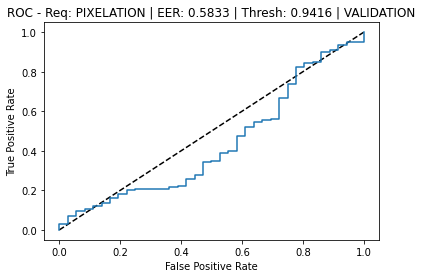

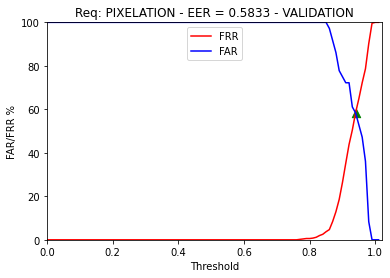

Requisite: PIXELATION - EER_interp: 58.330000000000005% - Best Threshold: 0.9415603876113994
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      0.42      0.08        36
    COMPLIANT       0.91      0.40      0.56       511

     accuracy                           0.40       547
    macro avg       0.48      0.41      0.32       547
 weighted avg       0.85      0.40      0.53       547

Confusion matrix ----------------------------------------
FAR: 58.330000000000005% | FRR: 59.88% | EER_mean: 59.11% | TP: 205 | TN: 15 | FP: 21 | FN: 306
Accuracy ------------------------------------------------
Model Accuracy: 40.22%
---------------------------------------------------------
Requisite: HAIR_EYES


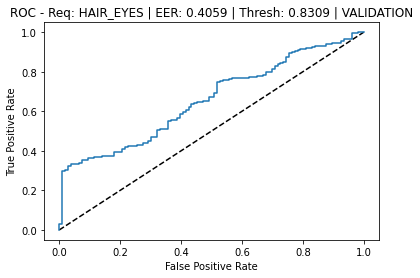

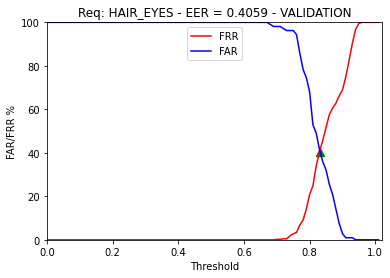

Requisite: HAIR_EYES - EER_interp: 40.589999999999996% - Best Threshold: 0.8309134804472631
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.59      0.36       106
    COMPLIANT       0.86      0.59      0.70       441

     accuracy                           0.59       547
    macro avg       0.56      0.59      0.53       547
 weighted avg       0.74      0.59      0.64       547

Confusion matrix ----------------------------------------
FAR: 40.57% | FRR: 40.589999999999996% | EER_mean: 40.58% | TP: 262 | TN: 63 | FP: 43 | FN: 179
Accuracy ------------------------------------------------
Model Accuracy: 59.41%
---------------------------------------------------------
Requisite: BACKGROUND


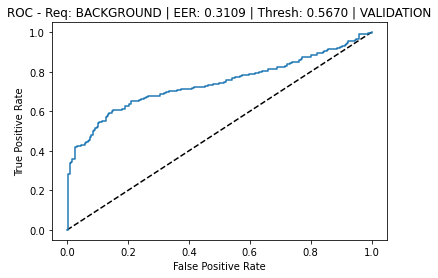

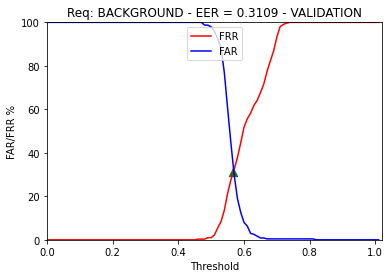

Requisite: BACKGROUND - EER_interp: 31.09% - Best Threshold: 0.5670297741889815
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.63      0.69      0.66       238
    COMPLIANT       0.74      0.69      0.71       309

     accuracy                           0.69       547
    macro avg       0.69      0.69      0.69       547
 weighted avg       0.69      0.69      0.69       547

Confusion matrix ----------------------------------------
FAR: 31.09% | FRR: 31.069999999999997% | EER_mean: 31.080000000000002% | TP: 213 | TN: 164 | FP: 74 | FN: 96
Accuracy ------------------------------------------------
Model Accuracy: 68.92%
---------------------------------------------------------
Requisite: RED_EYES


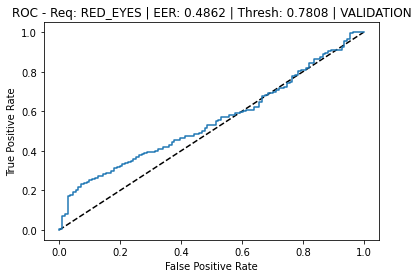

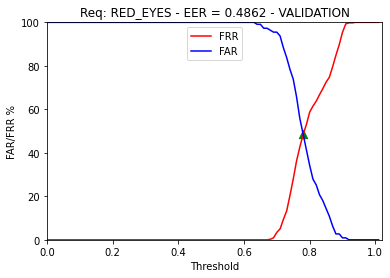

Requisite: RED_EYES - EER_interp: 48.620000000000005% - Best Threshold: 0.7807916282513819
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.21      0.52      0.30       111
    COMPLIANT       0.81      0.51      0.63       436

     accuracy                           0.52       547
    macro avg       0.51      0.52      0.47       547
 weighted avg       0.69      0.52      0.56       547

Confusion matrix ----------------------------------------
FAR: 47.75% | FRR: 48.620000000000005% | EER_mean: 48.18% | TP: 224 | TN: 58 | FP: 53 | FN: 212
Accuracy ------------------------------------------------
Model Accuracy: 51.55%
---------------------------------------------------------


In [19]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 1s 66ms/step
Prediction finished!
Requisite: MOUTH


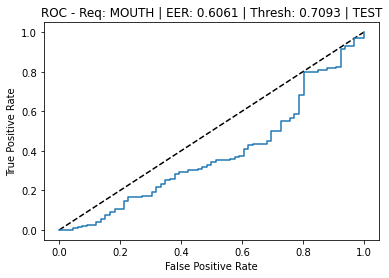

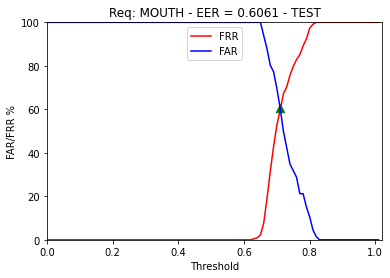

Requisite: MOUTH - EER_interp: 60.61% - Best Threshold: 0.7093021869659357
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.17      0.39      0.23        66
    COMPLIANT       0.69      0.41      0.52       222

     accuracy                           0.41       288
    macro avg       0.43      0.40      0.37       288
 weighted avg       0.57      0.41      0.45       288

Confusion matrix ----------------------------------------
FAR: 60.61% | FRR: 59.01% | EER_mean: 59.809999999999995% | TP: 91 | TN: 26 | FP: 40 | FN: 131
Accuracy ------------------------------------------------
Model Accuracy: 40.62%
---------------------------------------------------------
Requisite: ROTATION


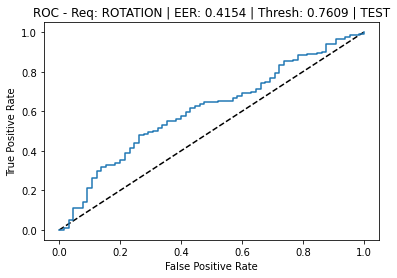

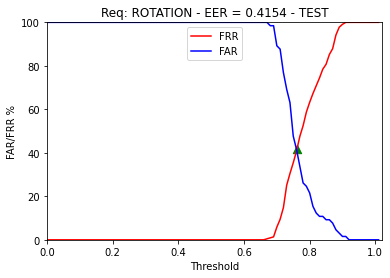

Requisite: ROTATION - EER_interp: 41.54% - Best Threshold: 0.7608910202981135
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      0.58      0.38        65
    COMPLIANT       0.83      0.57      0.68       223

     accuracy                           0.58       288
    macro avg       0.56      0.58      0.53       288
 weighted avg       0.70      0.58      0.61       288

Confusion matrix ----------------------------------------
FAR: 41.54% | FRR: 42.6% | EER_mean: 42.07% | TP: 128 | TN: 38 | FP: 27 | FN: 95
Accuracy ------------------------------------------------
Model Accuracy: 57.64%
---------------------------------------------------------
Requisite: L_AWAY


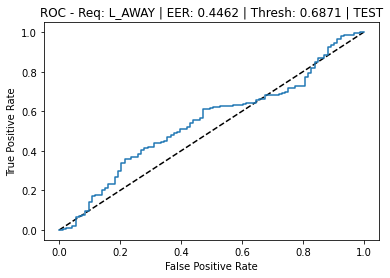

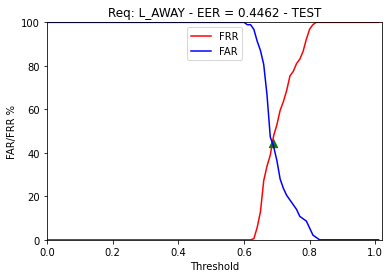

Requisite: L_AWAY - EER_interp: 44.62% - Best Threshold: 0.6871350829417889
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      0.56      0.45        93
    COMPLIANT       0.72      0.55      0.63       195

     accuracy                           0.56       288
    macro avg       0.55      0.56      0.54       288
 weighted avg       0.61      0.56      0.57       288

Confusion matrix ----------------------------------------
FAR: 44.09% | FRR: 44.62% | EER_mean: 44.36% | TP: 108 | TN: 52 | FP: 41 | FN: 87
Accuracy ------------------------------------------------
Model Accuracy: 55.559999999999995%
---------------------------------------------------------
Requisite: EYES_CLOSED


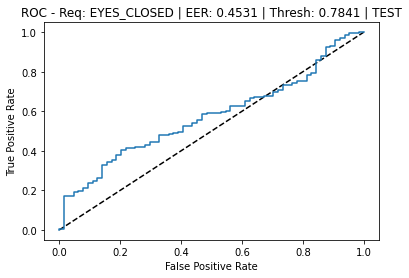

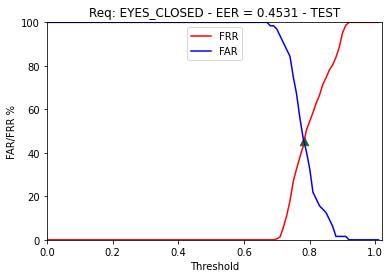

Requisite: EYES_CLOSED - EER_interp: 45.31% - Best Threshold: 0.784056663513214
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.55      0.35        64
    COMPLIANT       0.81      0.54      0.65       224

     accuracy                           0.54       288
    macro avg       0.53      0.54      0.50       288
 weighted avg       0.68      0.54      0.58       288

Confusion matrix ----------------------------------------
FAR: 45.31% | FRR: 45.98% | EER_mean: 45.64% | TP: 121 | TN: 35 | FP: 29 | FN: 103
Accuracy ------------------------------------------------
Model Accuracy: 54.169999999999995%
---------------------------------------------------------
Requisite: CLOSE


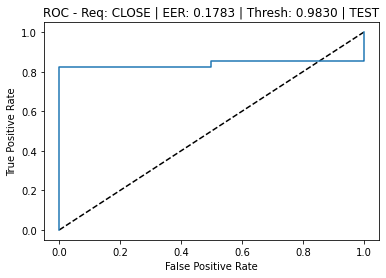

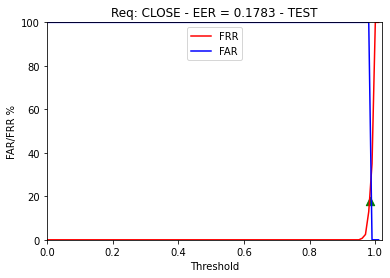

Requisite: CLOSE - EER_interp: 17.83% - Best Threshold: 0.9829627004536715
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      1.00      0.07         2
    COMPLIANT       1.00      0.82      0.90       286

     accuracy                           0.82       288
    macro avg       0.52      0.91      0.49       288
 weighted avg       0.99      0.82      0.90       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 17.83% | EER_mean: 8.91% | TP: 235 | TN: 2 | FP: 0 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 82.28999999999999%
---------------------------------------------------------
Requisite: HAT


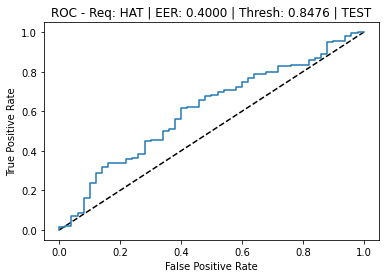

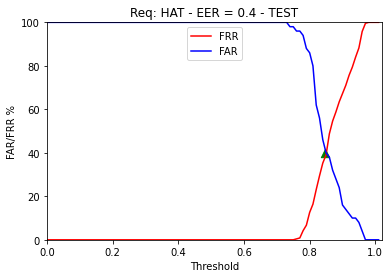

Requisite: HAT - EER_interp: 40.0% - Best Threshold: 0.8475539684295418
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.60      0.35        50
    COMPLIANT       0.88      0.62      0.73       238

     accuracy                           0.61       288
    macro avg       0.56      0.61      0.54       288
 weighted avg       0.77      0.61      0.66       288

Confusion matrix ----------------------------------------
FAR: 40.0% | FRR: 38.24% | EER_mean: 39.12% | TP: 147 | TN: 30 | FP: 20 | FN: 91
Accuracy ------------------------------------------------
Model Accuracy: 61.46%
---------------------------------------------------------
Requisite: DARK_GLASSES


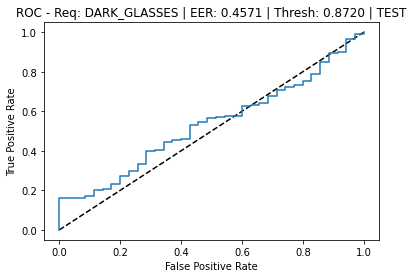

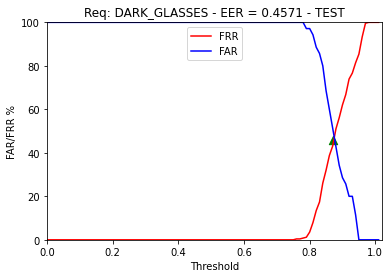

Requisite: DARK_GLASSES - EER_interp: 45.71% - Best Threshold: 0.8720064759254448
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.14      0.54      0.22        35
    COMPLIANT       0.90      0.55      0.68       253

     accuracy                           0.55       288
    macro avg       0.52      0.54      0.45       288
 weighted avg       0.80      0.55      0.62       288

Confusion matrix ----------------------------------------
FAR: 45.71% | FRR: 45.45% | EER_mean: 45.58% | TP: 138 | TN: 19 | FP: 16 | FN: 115
Accuracy ------------------------------------------------
Model Accuracy: 54.510000000000005%
---------------------------------------------------------
Requisite: FRAME_EYES


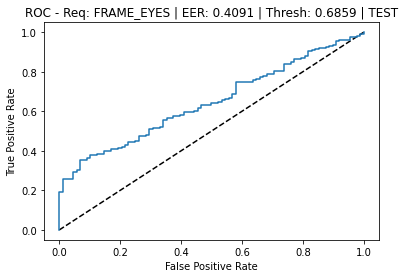

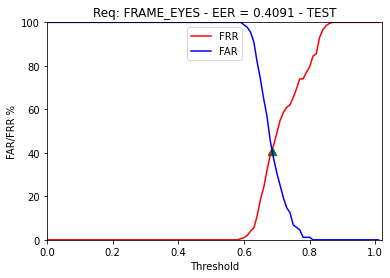

Requisite: FRAME_EYES - EER_interp: 40.910000000000004% - Best Threshold: 0.6859159469604423
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.39      0.59      0.47        88
    COMPLIANT       0.77      0.59      0.67       200

     accuracy                           0.59       288
    macro avg       0.58      0.59      0.57       288
 weighted avg       0.65      0.59      0.61       288

Confusion matrix ----------------------------------------
FAR: 40.910000000000004% | FRR: 40.5% | EER_mean: 40.71% | TP: 119 | TN: 52 | FP: 36 | FN: 81
Accuracy ------------------------------------------------
Model Accuracy: 59.38%
---------------------------------------------------------
Requisite: FLASH_LENSES


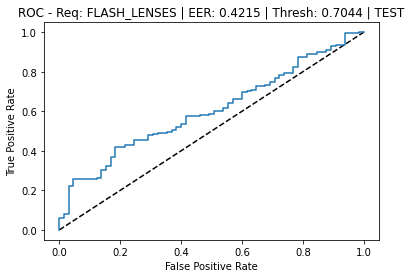

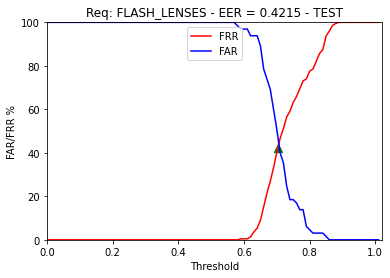

Requisite: FLASH_LENSES - EER_interp: 42.15% - Best Threshold: 0.704435548885699
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      0.58      0.39        65
    COMPLIANT       0.83      0.58      0.68       223

     accuracy                           0.58       288
    macro avg       0.56      0.58      0.53       288
 weighted avg       0.71      0.58      0.61       288

Confusion matrix ----------------------------------------
FAR: 41.54% | FRR: 42.15% | EER_mean: 41.839999999999996% | TP: 129 | TN: 38 | FP: 27 | FN: 94
Accuracy ------------------------------------------------
Model Accuracy: 57.989999999999995%
---------------------------------------------------------
Requisite: VEIL


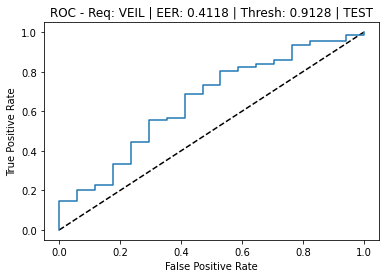

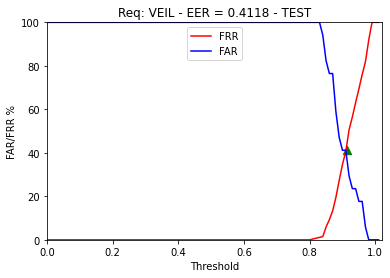

Requisite: VEIL - EER_interp: 41.18% - Best Threshold: 0.9127641320228578
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      0.59      0.14        17
    COMPLIANT       0.96      0.56      0.71       271

     accuracy                           0.57       288
    macro avg       0.52      0.58      0.42       288
 weighted avg       0.90      0.57      0.68       288

Confusion matrix ----------------------------------------
FAR: 41.18% | FRR: 43.54% | EER_mean: 42.36% | TP: 153 | TN: 10 | FP: 7 | FN: 118
Accuracy ------------------------------------------------
Model Accuracy: 56.599999999999994%
---------------------------------------------------------
Requisite: REFLECTION


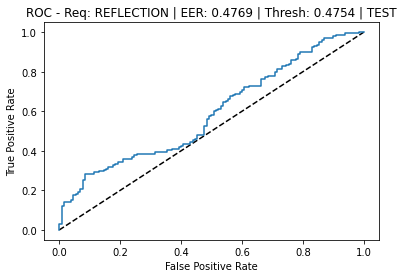

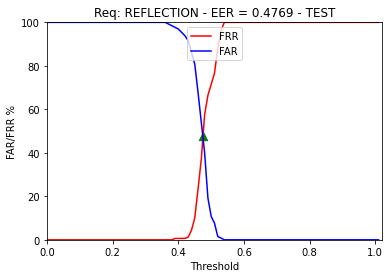

Requisite: REFLECTION - EER_interp: 47.69% - Best Threshold: 0.47535356879233115
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.52      0.50       130
    COMPLIANT       0.57      0.53      0.55       158

     accuracy                           0.52       288
    macro avg       0.52      0.52      0.52       288
 weighted avg       0.53      0.52      0.53       288

Confusion matrix ----------------------------------------
FAR: 47.69% | FRR: 47.47% | EER_mean: 47.58% | TP: 83 | TN: 68 | FP: 62 | FN: 75
Accuracy ------------------------------------------------
Model Accuracy: 52.43%
---------------------------------------------------------
Requisite: LIGHT


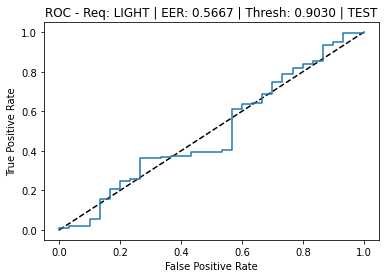

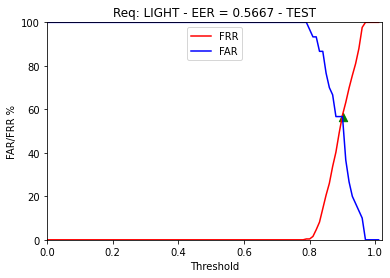

Requisite: LIGHT - EER_interp: 56.67% - Best Threshold: 0.9029676318168642
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.08      0.43      0.13        30
    COMPLIANT       0.86      0.40      0.55       258

     accuracy                           0.41       288
    macro avg       0.47      0.42      0.34       288
 weighted avg       0.78      0.41      0.51       288

Confusion matrix ----------------------------------------
FAR: 56.67% | FRR: 59.69% | EER_mean: 58.18% | TP: 104 | TN: 13 | FP: 17 | FN: 154
Accuracy ------------------------------------------------
Model Accuracy: 40.62%
---------------------------------------------------------
Requisite: SH_FACE


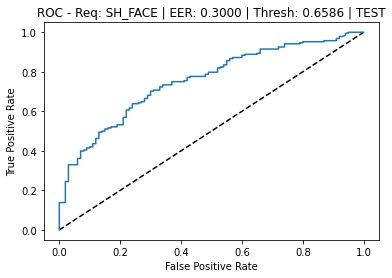

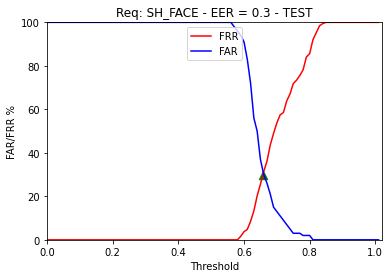

Requisite: SH_FACE - EER_interp: 30.0% - Best Threshold: 0.6585532426834105
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.56      0.70      0.62       100
    COMPLIANT       0.81      0.70      0.75       188

     accuracy                           0.70       288
    macro avg       0.69      0.70      0.69       288
 weighted avg       0.72      0.70      0.71       288

Confusion matrix ----------------------------------------
FAR: 30.0% | FRR: 29.79% | EER_mean: 29.9% | TP: 132 | TN: 70 | FP: 30 | FN: 56
Accuracy ------------------------------------------------
Model Accuracy: 70.14%
---------------------------------------------------------
Requisite: SH_HEAD


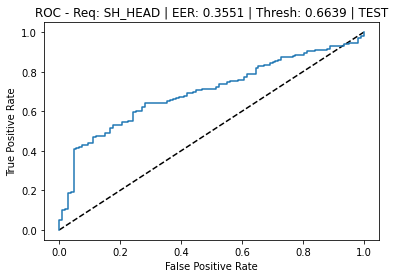

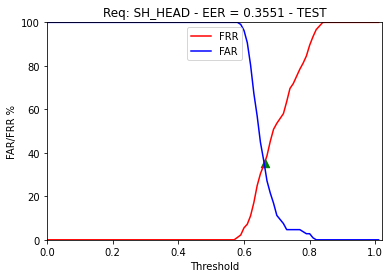

Requisite: SH_HEAD - EER_interp: 35.510000000000005% - Best Threshold: 0.6638800501823543
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.64      0.57       107
    COMPLIANT       0.75      0.64      0.69       181

     accuracy                           0.64       288
    macro avg       0.63      0.64      0.63       288
 weighted avg       0.66      0.64      0.65       288

Confusion matrix ----------------------------------------
FAR: 35.510000000000005% | FRR: 35.91% | EER_mean: 35.709999999999994% | TP: 116 | TN: 69 | FP: 38 | FN: 65
Accuracy ------------------------------------------------
Model Accuracy: 64.24%
---------------------------------------------------------
Requisite: BLURRED


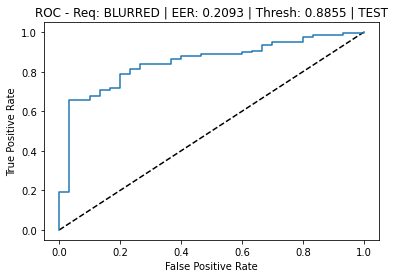

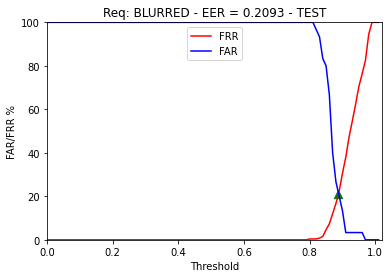

Requisite: BLURRED - EER_interp: 20.93% - Best Threshold: 0.8855003589807555
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.31      0.80      0.44        30
    COMPLIANT       0.97      0.79      0.87       258

     accuracy                           0.79       288
    macro avg       0.64      0.80      0.66       288
 weighted avg       0.90      0.79      0.83       288

Confusion matrix ----------------------------------------
FAR: 20.0% | FRR: 20.93% | EER_mean: 20.46% | TP: 204 | TN: 24 | FP: 6 | FN: 54
Accuracy ------------------------------------------------
Model Accuracy: 79.17%
---------------------------------------------------------
Requisite: SKIN_TONE


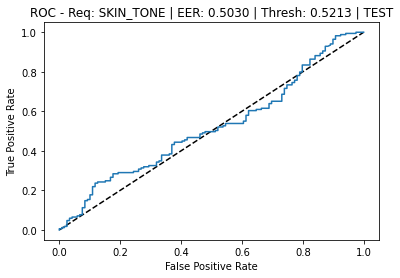

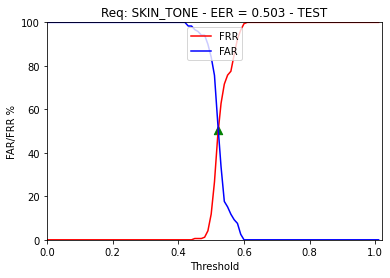

Requisite: SKIN_TONE - EER_interp: 50.3% - Best Threshold: 0.5212724577393056
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.41      0.50      0.45       119
    COMPLIANT       0.59      0.50      0.54       169

     accuracy                           0.50       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.52      0.50      0.50       288

Confusion matrix ----------------------------------------
FAR: 49.58% | FRR: 50.3% | EER_mean: 49.94% | TP: 84 | TN: 60 | FP: 59 | FN: 85
Accuracy ------------------------------------------------
Model Accuracy: 50.0%
---------------------------------------------------------
Requisite: WASHED_OUT


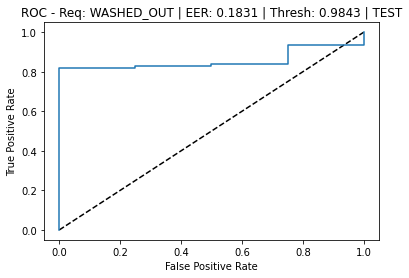

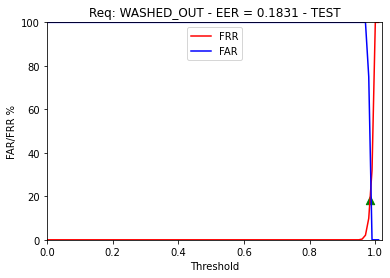

Requisite: WASHED_OUT - EER_interp: 18.310000000000002% - Best Threshold: 0.9843128525035482
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      1.00      0.13         4
    COMPLIANT       1.00      0.82      0.90       284

     accuracy                           0.82       288
    macro avg       0.54      0.91      0.52       288
 weighted avg       0.99      0.82      0.89       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 18.310000000000002% | EER_mean: 9.16% | TP: 232 | TN: 4 | FP: 0 | FN: 52
Accuracy ------------------------------------------------
Model Accuracy: 81.94%
---------------------------------------------------------
Requisite: PIXELATION


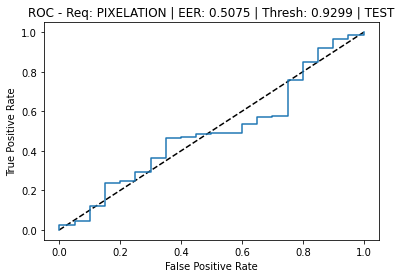

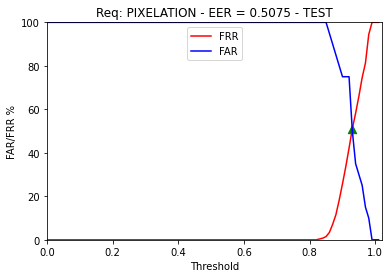

Requisite: PIXELATION - EER_interp: 50.74999999999999% - Best Threshold: 0.9299337241187025
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      0.50      0.12        20
    COMPLIANT       0.93      0.49      0.64       268

     accuracy                           0.49       288
    macro avg       0.50      0.50      0.38       288
 weighted avg       0.87      0.49      0.61       288

Confusion matrix ----------------------------------------
FAR: 50.0% | FRR: 50.74999999999999% | EER_mean: 50.370000000000005% | TP: 132 | TN: 10 | FP: 10 | FN: 136
Accuracy ------------------------------------------------
Model Accuracy: 49.309999999999995%
---------------------------------------------------------
Requisite: HAIR_EYES


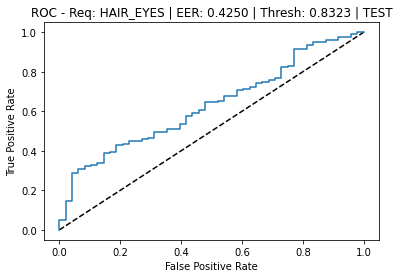

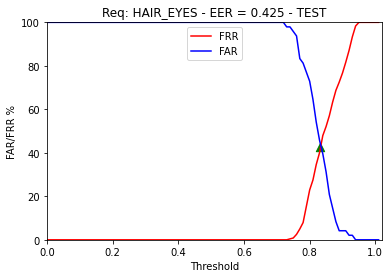

Requisite: HAIR_EYES - EER_interp: 42.5% - Best Threshold: 0.8323168516159057
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.22      0.58      0.31        48
    COMPLIANT       0.87      0.57      0.69       240

     accuracy                           0.58       288
    macro avg       0.54      0.58      0.50       288
 weighted avg       0.76      0.58      0.63       288

Confusion matrix ----------------------------------------
FAR: 41.67% | FRR: 42.5% | EER_mean: 42.08% | TP: 138 | TN: 28 | FP: 20 | FN: 102
Accuracy ------------------------------------------------
Model Accuracy: 57.64%
---------------------------------------------------------
Requisite: BACKGROUND


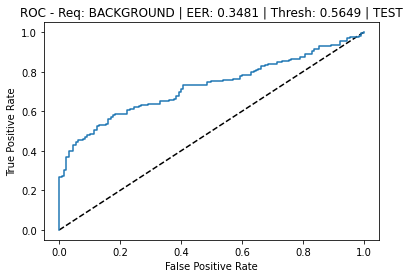

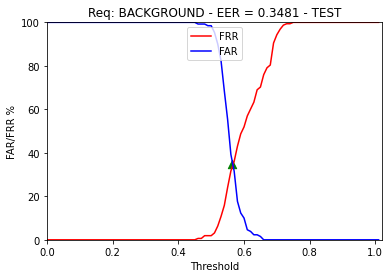

Requisite: BACKGROUND - EER_interp: 34.81% - Best Threshold: 0.5649110252344156
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.61      0.65      0.63       130
    COMPLIANT       0.70      0.65      0.67       158

     accuracy                           0.65       288
    macro avg       0.65      0.65      0.65       288
 weighted avg       0.66      0.65      0.65       288

Confusion matrix ----------------------------------------
FAR: 34.62% | FRR: 34.81% | EER_mean: 34.72% | TP: 103 | TN: 85 | FP: 45 | FN: 55
Accuracy ------------------------------------------------
Model Accuracy: 65.28%
---------------------------------------------------------
Requisite: RED_EYES


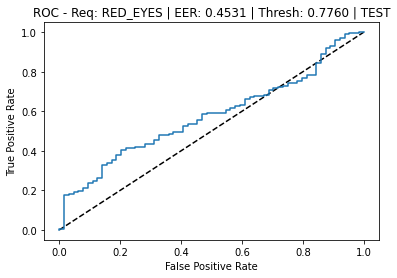

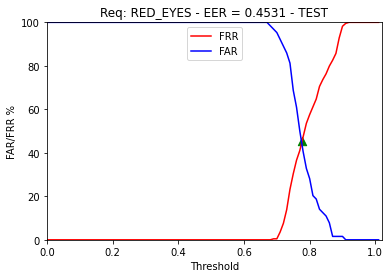

Requisite: RED_EYES - EER_interp: 45.31% - Best Threshold: 0.7760409116744548
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.55      0.35        64
    COMPLIANT       0.81      0.55      0.66       224

     accuracy                           0.55       288
    macro avg       0.53      0.55      0.50       288
 weighted avg       0.69      0.55      0.59       288

Confusion matrix ----------------------------------------
FAR: 45.31% | FRR: 44.64% | EER_mean: 44.98% | TP: 124 | TN: 35 | FP: 29 | FN: 100
Accuracy ------------------------------------------------
Model Accuracy: 55.21%
---------------------------------------------------------


In [20]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Visualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()